## **Índice:**
* Introdução
* O RMS Titanic
* Importando as bibliotecas
* Obtendo os dados
* Exploração/Análise de Dados
* Pré-processamento dos dados
    - Dados ausentes
    - Convertendo os parametros
    - Criando Categorias
    - Criando novos parametros
* Criação dos Modelos de Machine Learning
    - Treinando 8 modelos diferentes
    - Qual é o melhor modelo?
    - K-Fold Cross Validation
* Random Forest 
    - O que é Random Forest ?
    - Parametros importantes
    - Ajuste de hiperparâmetros   
* Avaliação adicional 
    - Matriz de Confusão
    - Precisão e Recall 
    - F-Score
    - Curva de Rechamada de Precisão
    - Curva ROC AUC
    - ROC AUC Score
* Submissão
* Resumo

# **Introdução**

Neste notebook eu vou passar por todo o processo de criação de um modelo de aprendizado de máquina no famoso conjunto de dados Titanic, que é usado por muitas pessoas em todo o mundo. Ele fornece informações sobre o destino dos passageiros no Titanic, resumidos de acordo com o status econômico (classe), sexo, idade e sobrevivência. Neste desafio, somos solicitados a prever se um passageiro do Titanic teria sobrevivido ou não.

# **O RMS Titanic**

O RMS Titanic era um navio de passageiros britânico que afundou no Oceano Atlântico Norte nas primeiras horas da manhã de 15 de abril de 1912, após colidir com um iceberg durante sua viagem inaugural de Southampton para a cidade de Nova York. Havia um número estimado de 2.224 passageiros e tripulantes a bordo do navio, e mais de 1.500 morreram, tornando-se um dos mais mortais desastres marítimos comerciais em tempos de paz da história moderna. O RMS Titanic foi o maior navio à tona na época em que entrou em operação e foi o segundo de três transatlânticos de classe olímpica operados pela White Star Line. O Titanic foi construído pelo estaleiro Harland and Wolff em Belfast. Thomas Andrews, seu arquiteto, morreu no desastre.

![Titanic](https://www.cruisemapper.com/images/news/3956-21b7ab89728.jpg)

# **Importando as bibliotecas**

In [2]:
#Algebra Linear
import numpy as np 

# Processamento/manipulação dos dados
import pandas as pd 

# Visualização dos dados
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#Algoritimos Machine Learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# **Obtendos os dados**

In [3]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# **Exploração/Análise de Dados**

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


** O conjunto de treinamento tem 891 exemplos e 11 características + a variável de destino (Survived) **. 2 dos recursos são floats, 5 são inteiros e 5 são objetos. Abaixo listei os recursos com uma breve descrição:

    survival:	Sobrevivente
    PassengerId: ID único de um passageiro
    pclass:	Classe de bilhetes	
    sex:	Sexo
    Age:	Idade em anos	
    sibsp:	Número de irmãos / cônjuges a bordo do Titanic	
    parch:	Número de pais / filhos a bordo do Titanic	
    ticket:	Numero do bilhete	
    fare:	Tarifa de passageiros	
    cabin:	Número de cabine	
    embarked:	Porto de embarcação

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Acima podemos ver que **38% do conjunto de treinamento sobreviveu ao Titanic**. Também podemos ver que as idades dos passageiros variam de 0,4 a 80. Além disso, já podemos detectar alguns recursos que contêm valores ausentes, como o recurso **"Age".**

In [7]:
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Em nosso dataset acima, podemos notar algumas coisas. Em primeiro lugar, precisamos **converter muitos recursos em numéricos**, mais tarde, para que os algoritmos de aprendizado de máquina possam processá-los. Além disso, podemos ver que os recursos do **têm intervalos muito diferentes**, que precisaremos converter em aproximadamente na mesma escala. Também podemos detectar mais alguns recursos, que contêm valores ausentes (NaN = não um número), que precisam ser tratados.

**Vamos dar uma olhada mais detalhada em quais dados estão realmente ausentes:**

In [8]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


O recurso Embarcado tem apenas dois valores ausentes, que podem ser facilmente preenchidos. Será muito mais complicado lidar com o recurso 'Age', que tem 177 valores em falta. O recurso 'Cabin' precisa de uma investigação mais aprofundada, mas provavelmente removeremos do conjunto de dados, já que 77% dele está faltando.

In [9]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Acima você pode ver os 11 recursos + a variável de destino (sobreviveu). ** Quais recursos podem contribuir para uma alta taxa de sobrevida? **

Para mim, faria sentido se tudo, exceto 'PassengerId', 'Ticket' e 'Name', fosse correlacionado com uma alta taxa de sobrevivência.

**1. Idade e Sexo:**

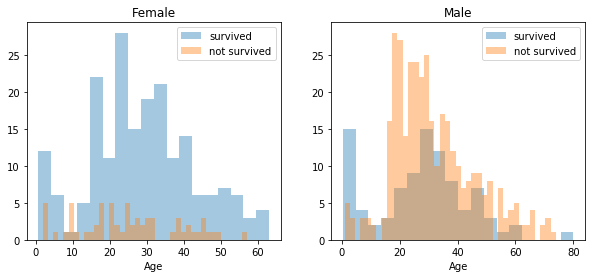

In [10]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Você pode ver que os homens têm uma alta probabilidade de sobrevivência quando têm entre 18 e 30 anos, o que também é um pouco verdadeiro para as mulheres, mas não totalmente. Para as mulheres, as chances de sobrevivência são maiores entre 14 e 40 anos.

Para os homens, a probabilidade de sobrevivência é muito baixa entre os 5 e os 18 anos, mas isso não é verdade para as mulheres. Outra coisa a notar é que os bebês também têm uma probabilidade um pouco maior de sobrevivência.

Uma vez que parece haver **algumas idades, que aumentaram as chances de sobrevivência** e porque eu quero que todos os recursos estejam mais ou menos na mesma escala, criaremos grupos etários mais tarde.

**3. Embarcação, Classes de bilhetes e Sexo:**

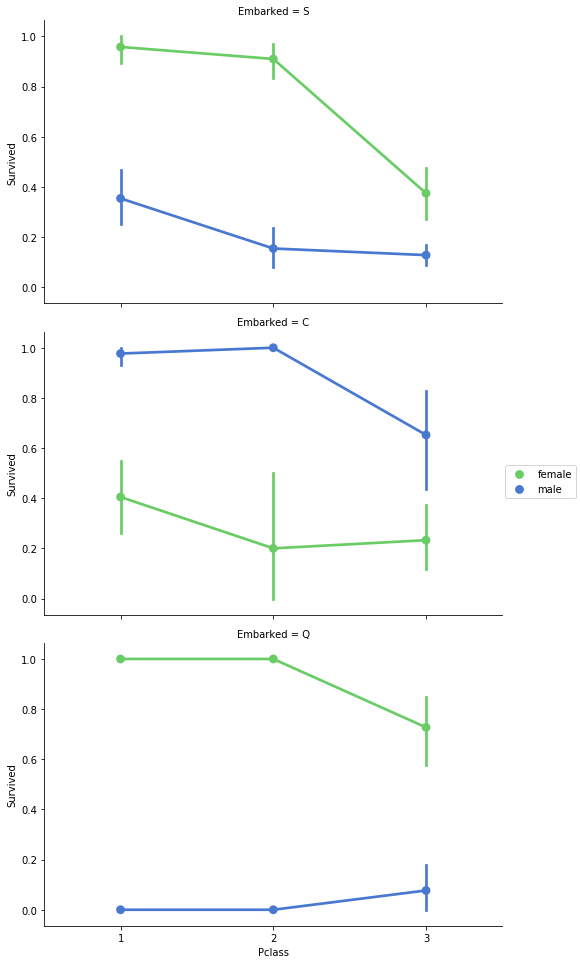

In [12]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette="muted",  order=None, hue_order=None )
FacetGrid.add_legend()

**Embarked** parece estar correlacionada com a sobrevivência, dependendo do sexo.

As mulheres na porta Q e na porta S têm maior chance de sobrevivência. O inverso é verdadeiro, se estiverem na porta C. Os homens têm uma alta probabilidade de sobrevivência se estiverem na porta C, mas uma probabilidade baixa se estiverem na porta Q ou S.

**Pclass** também parece estar correlacionado com a sobrevivência. Vamos gerar outro gráfico abaixo.

**4. Pclass:**

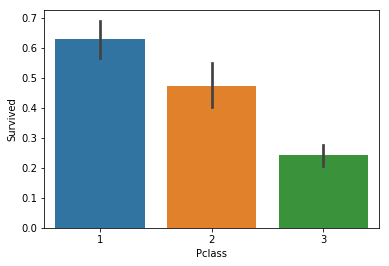

In [13]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

Aqui vemos claramente que a **Pclass** está contribuindo para a chance de sobrevivência de uma pessoa, especialmente se essa pessoa está na classe 1. Vamos criar outra plotagem de **Pclass** abaixo.

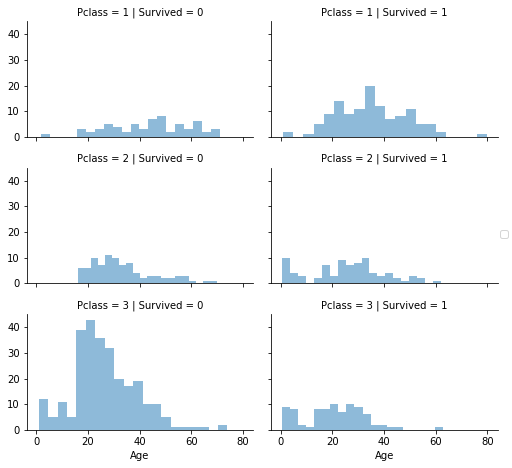

In [14]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

O gráfico acima confirma nossa suposição sobre a **PClass** 1, mas também podemos identificar uma alta probabilidade de que uma pessoa na pclasse 3 não sobreviva.

**5.  SibSp and Parch:**

SibSp e Parch faria mais sentido como uma característica combinada, que mostra o número total de parentes, uma pessoa tem no Titanic. Vou criá-lo abaixo e também um recurso que semeia se alguém não está sozinho.

In [15]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [16]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

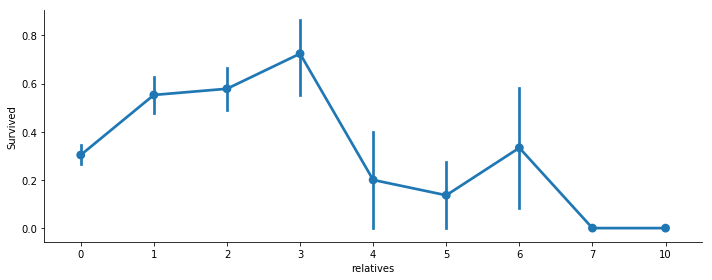

In [17]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

Aqui podemos ver que temos uma alta probabilidade de sobrevivência com 1 a 3 parentes, mas uma menor probabilidade se você tem menos de 1 ou mais de 3 (exceto em alguns casos com 6 parentes).

# **Pré-Processamento de Dados**

Primeiro, vamos remover **'PassengerId'** do conjunto de treino, porque isso não contribui para a probabilidade de sobrevivência de uma pessoa. Eu não vou soltá-lo do conjunto de testes, já que é necessário para o envio

In [18]:
train_df = train_df.drop(['PassengerId'], axis=1)

## Dados Ausentes:
### Cabine:
Como lembrete, temos que lidar com a Cabine (687), Embarcou (2) e Idade (177).

Primeiro eu lembrei, que deveriamos deletar a variável **'Cabin'** mas então eu achei algo interessante. Um número de cabine que se parece com "C123" e a letra "** refere-se ao convés **.

Portanto, vamos extraí-los e criar um novo recurso que contenha um deck de pessoas. Depois, converteremos o recurso em uma variável numérica. Os valores ausentes serão convertidos em zero.

Na foto abaixo você pode ver os decks atuais do Titanic, variando de A a G.
![titanic decks](http://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/687px-Titanic_cutaway_diagram.png)

In [19]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 

In [20]:
# Agora podemos excluir a variavel cabine
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

### Age:

Agora podemos resolver o problema com os valores ausentes da faixa etária. Vou criar uma matriz que contém números aleatórios, que são calculados com base no valor médio de idade em relação ao **desvio padrão e is_null**.

In [21]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # computar números aleatórios entre a média, std e is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # preencher valores NaN na coluna Idade com valores aleatórios gerados
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [22]:
train_df["Age"].isnull().sum()

0

### Embarked:

Como a coluna **Embarked** tem apenas dois valores ausentes, apenas os preencheremos com o mais comum.

In [23]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [24]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

## Convertendo os Parametros:

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.1+ KB


Acima você pode ver que **'Fare'** é um float e nós temos que lidar com 4 características categóricas: Nome, Sexo, Ticket e Embarked. Vamos investigar e transformar um após o outro.

### Fare:

Convertendo **"Fare"** de float para int64, usando a função "astype ()", que a biblioteca pandas fornece:

In [26]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

### Name:
Usaremos o recurso **Name** para extrair os Títulos do Nome, para que possamos criar um novo recurso a partir disso.

In [27]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extraindo os titulos
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # substituir títulos com um título mais comum ou como Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # converter títulos em números
    dataset['Title'] = dataset['Title'].map(titles)
    # Inserindo o 0 nos campos NaN 
    dataset['Title'] = dataset['Title'].fillna(0)

In [28]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

### Sex:

Convertendo **'Sex'** em numérico.

In [29]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

### Ticket:

In [30]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Como o atributo **Ticket** temos 681 tickets únicos, será um pouco complicado convertê-los em categorias úteis. Então vamos remove-los do conjunto de dados.

In [31]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

### Embarked:
Convertendo **'Embarked'** em numerico.

In [32]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

## Criando as Categorias:

Vamos agora criar categorias dentro dos seguintes recursos:

### Age:
Agora precisamos converter o recurso **'Age'**. Primeiro vamos convertê-lo de float para inteiro. Em seguida, criaremos a nova variável **"AgeGroup"**, categorizando cada idade em um grupo. Observe que é importante prestar atenção em como você forma esses grupos, pois você não deseja, por exemplo, que 80% dos seus dados caiam grupo 1.

In [33]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [36]:
# Verificando a distribuição
train_df['Age'].value_counts()

4    167
6    157
5    146
3    141
2    114
1     98
0     68
Name: Age, dtype: int64

### Fare:
Para o recurso **"Fare"**, precisamos fazer o mesmo com o recurso **"Age"**. Mas não é tão fácil, porque se cortarmos o intervalo dos valores de tarifa em algumas categorias igualmente grandes, 80% dos valores cairiam na primeira categoria. Felizmente, podemos usar a função **"qcut()"**, que podemos usar para ver como podemos formar as categorias.

In [37]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,4,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [38]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

# Criando novos parametros

Eu adicionei dois novos recursos ao conjunto de dados, que eu computo de outros recursos.

### 1. Age times Class

In [39]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

### 2.  Fare per Person

In [40]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [41]:
# Vamos dar uma última olhada no conjunto de treinamento, antes de começarmos a treinar os modelos.
train_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,4,0,0,1,2,0,1,8,1,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


# **Criação dos Modelos de Machine Learning**

In [42]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [43]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")

71.38 %


In [44]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.59 %


In [45]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

81.59 %


In [46]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

86.42 %


In [47]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

77.78 %


In [48]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

77.33 %


In [49]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

81.59 %


In [50]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

92.59 %


##  Qual é o melhor modelo ?

In [51]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.59,Random Forest
92.59,Decision Tree
86.42,KNN
81.59,Support Vector Machines
81.59,Logistic Regression
77.78,Naive Bayes
77.33,Perceptron
71.38,Stochastic Gradient Decent


Como podemos ver, o Random Forest fica em primeiro lugar. Mas antes, vamos verificar como funciona o Random Forest quando usamos Cross Validation.

## K-Fold Cross Validation:

K-Fold Cross Validation divide aleatoriamente os dados de treinamento em **K subsets called folds**. Vamos imaginar que dividiríamos nossos dados em 4 dobras (K = 4). Nosso modelo Random Forest seria treinado e avaliado 4 vezes, usando uma dobra diferente para avaliação toda vez, enquanto seria treinado nas 3 dobras restantes.

A imagem abaixo mostra o processo, usando 4 dobras (K = 4). Cada linha representa um processo de treinamento + avaliação. Na primeira linha, o modelo é treinado no primeiro, segundo e terceiro subconjunto e avaliado no quarto. Na segunda linha, o modelo é treinado no segundo, terceiro e quarto subconjunto e avaliado no primeiro. O K-Fold Cross Validation repete este processo até que cada dobra tenha atuado uma vez como uma dobra de avaliação.

![cross-v.](https://img3.picload.org/image/ddwrppcl/bildschirmfoto2018-02-02um10.0.png)

O resultado do nosso exemplo **K-Fold Cross Validation** seria uma matriz que contém 4 pontuações diferentes. Então, precisamos calcular a média e o desvio padrão para essas pontuações.

O código abaixo executa a  K-Fold Cross Validation em nosso modelo Random Forest, usando 10 dobras (K = 10). Portanto, gera uma matriz com 10 pontuações diferentes.

In [52]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

In [53]:
print("Score:", scores)
print("Média:", scores.mean())
print("Desvio Padrão:", scores.std())

Score: [ 0.76666667  0.81111111  0.76404494  0.83146067  0.87640449  0.84269663
  0.84269663  0.7752809   0.85393258  0.84090909]
Média: 0.820520372262
Desvio Padrão: 0.0373941353509


Isso parece muito mais realista do que antes. Nosso modelo tem uma precisão média de 82% com um desvio padrão de 4%. O desvio padrão nos mostra quão precisas são as estimativas.

Isso significa, no nosso caso, que a precisão do nosso modelo pode diferir **mais ou menos 4%.**

Acho que a precisão ainda é muito boa e, como o Random Forest é um modelo fácil de usar, tentaremos aumentar ainda mais o desempenho na seção seguinte.

# **Random Forest**

## O que é Random Forest ?

Random Forest é um algoritmo de aprendizado supervisionado. Como você vê pelo nome, o algoritimo cria uma floresta e torna aleatória. A floresta que constrói, é um conjunto de Árvores de Decisão, na maioria das vezes treinadas com o método de **“ensacamento”**. A ideia geral do método de ensacamento é que uma combinação de modelos de aprendizagem aumenta o resultado geral.

Para dizer isso em palavras simples: O **algoritimo Random Forest** cria várias árvores de decisão e as mescla para obter uma previsão mais precisa e estável.

Uma grande vantagem do Random Forest é que ele pode ser usada para problemas de classificação e regressão, que formam a maioria dos sistemas atuais de aprendizado de máquina. Com poucas exceções, um classificador com Random Forest tem todos os hiperparâmetros de um classificador de uma árvore de decisão e também todos os hiperparâmetros de um classificador de ensacamento, para controlar o conjunto em si.

O algoritmo Random Forest traz aleatoriedade extra para o modelo, quando as árvores estão crescendo. Em vez de procurar o melhor recurso ao dividir um nó, ele procura o melhor recurso entre um subconjunto aleatório de recursos. Esse processo cria uma ampla diversidade, o que geralmente resulta em um modelo melhor. Portanto, quando você está desenvolvendo uma árvore com Random Forest, apenas um subconjunto aleatório dos recursos é considerado para dividir um nó. Você pode até tornar as árvores mais aleatórias, usando limites aleatórios, para cada recurso, em vez de procurar os melhores limites possíveis (como acontece com uma árvore de decisão normal).

Abaixo está um exemplo usando Random Forest com duas árvores:

![picture](https://img3.picload.org/image/dagpgdpw/bildschirmfoto-2018-02-06-um-1.png)

## Parametros Importantes

Outra grande qualidade do Random Forest é que ele facilita muito a medição da importância relativa de cada recurso. O Sklearn mede a importância de um recurso observando quanto nós da arvore, usam esse recurso, reduzem a impureza em média (em todas as vezes que utilizamos o algoritimo Random Forest). Ele calcula essa pontuação automaticamente para cada recurso após o treinamento e dimensiona os resultados para que a soma de todas os parametros seja igual a 1. Veremos abaixo:

In [54]:
parametros = pd.DataFrame({'feature':X_train.columns,'Parametros':np.round(random_forest.feature_importances_,3)})
parametros = parametros.sort_values('Parametros',ascending=False).set_index('feature')

In [55]:
parametros.head(15)

,Parametros
feature,
Title,0.184
Sex,0.179
Age_Class,0.099
Deck,0.091
Age,0.075
Fare,0.073
Pclass,0.069
relatives,0.055
Embarked,0.054


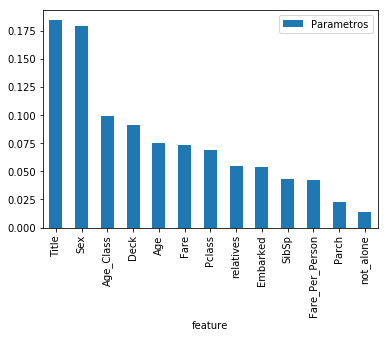

In [56]:
parametros.plot.bar()

**Conclusão:**

**not_alone e Parch** não desempenha um papel significativo em nosso modelo classificação utilizanbdo **Random Forest**. Por causa disso, vamos remove-los do conjunto de dados e treinar novamente nosso modelo. Também podemos remover mais parametros, mas isso exigiria uma investigação mais detalhada do efeito dos parametros em nosso modelo.

In [57]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

**Treinando nosso modelo novamente:**

In [58]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.59 %


Nosso modelo teve o mesmo score de antes. Uma regra geral é que, quanto mais parametros/variaveis tivermos, **mais provável será que o modelo tenha um overfitting** e vice-versa. Mas acho que os dados do modelo estão bons por enquanto e não temos muitos parametros.

Há também outra maneira de avaliar nosso algoritimo Random Forest, que é provavelmente muito mais preciso do que a pontuação usada anteriormente. Estou falando de usarmos a técnica **Out-of-bag (OOB)** para estimar a precisão da generalização. Não vou entrar em detalhes de como funciona o **OOB**, mas clicando <a href="https://en.wikipedia.org/wiki/Out-of-bag_error">aqui</a> você tera mais informações. Mas observando a estimativa o **Out-of-bag (OOB)** é tão preciso quanto usar um conjunto de teste do mesmo tamanho que o conjunto de treinamento. Portanto, usar o **Out-of-bag (OOB)**  elimina a necessidade de um conjunto de teste reservado.

In [59]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.37 %


Agora podemos começar a ajustar os hiperparâmetros  do nosso algoritimo Random Forest

## Ajuste dos Hiperparâmetros


Abaixo veremos o código do ajuste dos hiperparâmetros para o critério dos parâmetros, **min_samples_leaf, min_samples_split e n_estimators.**

Eu coloquei este código em uma célula de remarcação e não em uma célula de código, porque leva muito tempo para executá-lo. Diretamente por baixo, coloquei uma captura de tela da saída da grade.

param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}


from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid,
                    n_jobs=-1)

clf.fit(X_train, Y_train)        

clf.best_params_

![GridSearch Output](https://img2.picload.org/image/ddwglili/bildschirmfoto2018-02-01um15.4.png)

**Teste novos parametros:**

In [60]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.05 %


Agora que temos um modelo adequado, podemos começar a avaliar sua performace de maneira mais precisa. Anteriormente, usamos apenas a precisão e o score de oob, que é apenas outra forma de precisão. O problema é que é mais complicado avaliar um modelo de classificação do que um modelo de regressão. Vamos falar sobre isso na seção seguinte.

# **Avaliação Adicional**



## Matriz de Confusão:

In [61]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[492,  57],
       [ 95, 247]], dtype=int64)

A primeira linha é sobre as predições dos não sobreviventes: **492 passageiros foram classificados corretamente como não sobreviventes** (chamados de verdadeiros negativos) e **57 foram erroneamente classificados como não sobreviventes** (falsos negativos).

A segunda linha é sobre as previsões dos sobreviventes: **95 passageiros classificados erroneamente como sobreviventes** (falsos positivos) e **247 onde corretamente classificados como sobreviventes** (positivos verdadeiros).

Uma matriz de confusão fornece muitas informações sobre o desempenho do nosso modelo, mas há uma maneira de obter ainda mais informações, por exemplo como calcular a precisão dos classificadores.

## Precisão e Recuperação:

In [62]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8125
Recall: 0.722222222222


Nosso modelo prevê 81% do tempo, uma sobrevivência de passageiros corretamente (precisão). A (Recuperação) nos diz que o modelo previu a sobrevivência de 72% das pessoas que realmente sobreviveram.

## F-Score

Você pode combinar precisão e recuperação em uma pontuação, chamada de **F-Score**. O F-Score é calculado com a média harmônica de precisão e recuperação. Observe que ele atribui muito mais peso a valores baixos. Com o resultado disso, o classificador só obterá um valor F alto, se tanto a recuperação quanto a precisão forem altas.

In [63]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.76470588235294112

Nosso resultado foi um F-Score de 76%. A pontuação não é tão alta, porque o resultado da nossa recuperação foi de 72%.

Mas infelizmente o F-score não é perfeito, porque favorece os classificadores que têm uma precisão e uma recuperação semelhantes. Isso é um problema, porque às vezes você quer uma alta precisão e, às vezes, uma alta recuperação. A coisa é que uma precisão crescente, às vezes, resulta em um recuperação decrescente e vice-versa (dependendo do limite). Isso é chamado de troca de precisão / recuperação. Vamos ver isso abaixo.

## Precision Recall Curve

Para cada pessoa que nosso algoritmo Random Forest precisa classificar, ele calcula uma probabilidade baseada em uma função e classifica a pessoa como sobrevivente (quando a pontuação é maior do que o limite) ou como não sobrevivente (quando a pontuação é menor que o limite). É por isso que o limitar desempenha um papel importante.

Vamos plotar a precisão e recuperar com o limite usando o matplotlib:

In [64]:
from sklearn.metrics import precision_recall_curve

# Obtendo as probabilidades de nossas previsões
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

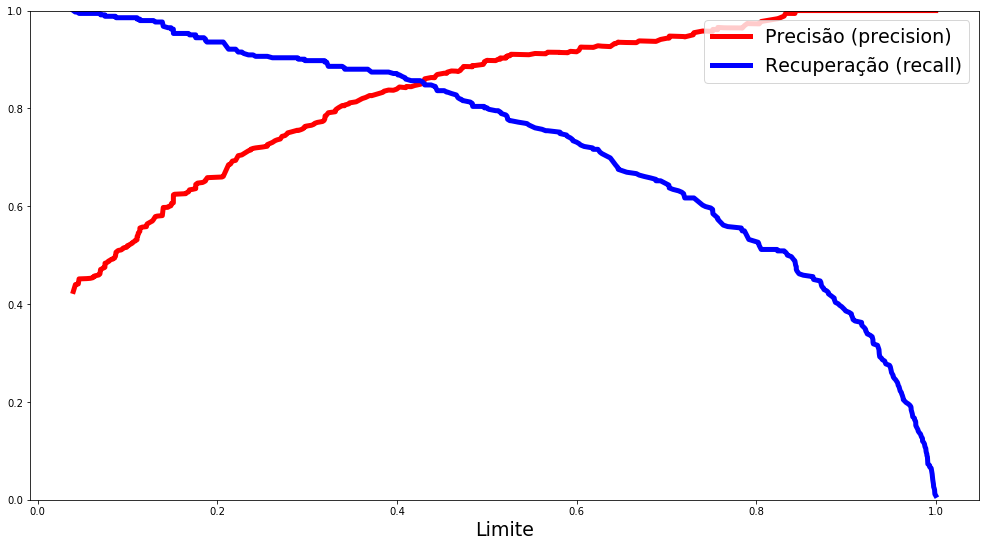

In [67]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precisão (precision)", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="Recuperação (recall)", linewidth=5)
    plt.xlabel("Limite", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(17, 9))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Acima podemos ver claramente que o **Recuperação(Recall)** está caindo rapidamente com uma precisão de cerca de 85%. Por causa disso, você pode querer selecionar a troca de precisão / recuperação antes disso - talvez em torno de 75%.

Agora você pode escolher um limite, que oferece a melhor compensação de precisão / recuperação para seu problema atual de aprendizado de máquina. Se você quiser, por exemplo, uma precisão de 80%, você pode facilmente olhar para os gráficos e ver que você precisaria de um limite de cerca de 0,4. Então você poderia treinar um modelo com exatamente esse limite e obteria a precisão desejada.


Outra maneira é traçar a precisão e recordar uns contra os outros:

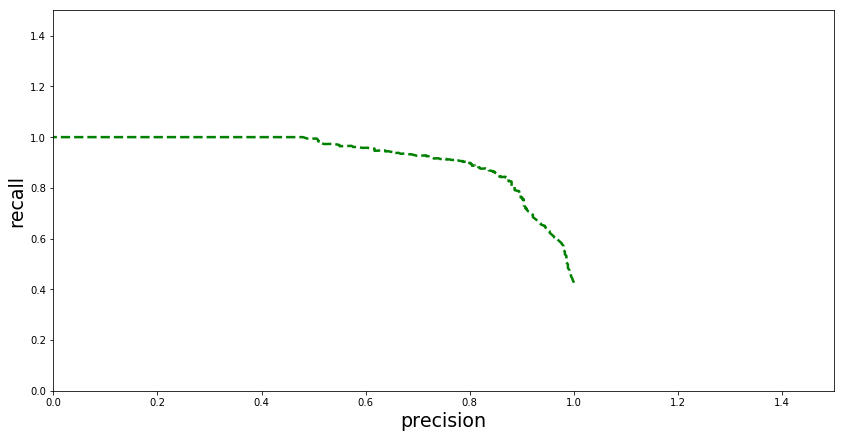

In [68]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

## Curva ROC AUC

Outra maneira de avaliar e comparar nosso modelo de classificação é utilizar **Curva ROC AUC**. Esta curva representa a taxa positiva real (também chamada de recall) contra a taxa de falsos positivos (proporção de instâncias negativas incorretamente classificadas), em vez de traçar a precisão versus a recuperação.

In [69]:
from sklearn.metrics import roc_curve
# calcular taxa positiva verdadeira e taxa de falsos positivos
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

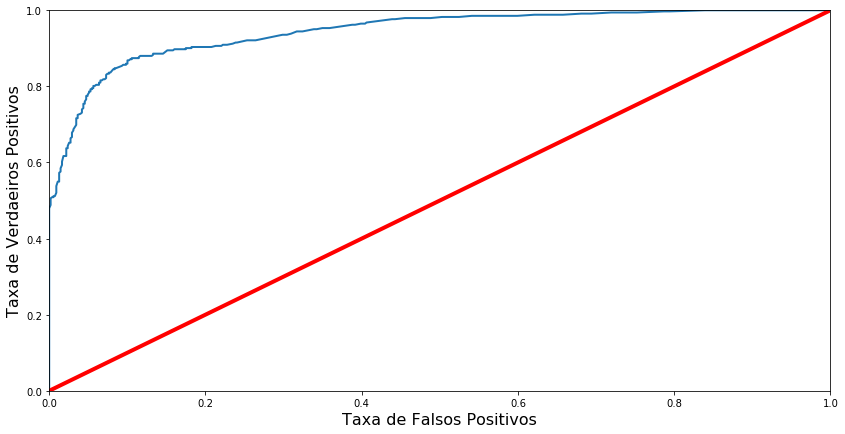

In [70]:
# plotando  a Curva ROC AUC
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Taxa de Falsos Positivos', fontsize=16)
    plt.ylabel('Taxa de Verdaeiros Positivos', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

A linha vermelha no meio representa um classificador puramente aleatório (por exemplo, um coin flip) e, portanto, seu classificador deve estar o mais longe possível. Nosso modelo Random Forest parece ter feito um bom trabalho.

É claro que também temos uma desvantagem aqui, porque o classificador produz mais falsos positivos, quanto maior a taxa positiva verdadeira.

## ROC AUC Score
A ROC AUC Score é a pontuação correspondente à Curva ROC AUC. É calculado simplesmente medindo a área sob a curva, que é chamada de AUC.

Um classificador 100% correto teria uma pontuação AUC ROC de 1 e um classificador completamente aleatório teria uma pontuação de 0,5.

In [71]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.943738748815


Excelente! Temos 94% acho que é pontuação boa o suficiente para enviar as previsões para o conjunto de teste para o ranking de Kaggle.

# **Submissão**

In [72]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_prediction
    })
submission.to_csv('submission.csv', index=False)

Notebook created by: **Samuel da Silva Oliveira**

<a href="https://www.linkedin.com/in/samuel-oliveira-74278873/">Linkedin</a>

<a href="https://www.kaggle.com/samukaunt">Kaggle</a>

<a href="https://github.com/samukaunt">Github</a>
